In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

%matplotlib inline

In [2]:
data1 = pd.read_excel('odidata02.xlsx')
data1.tail()

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H W,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season
79325,London Reds,Leicester,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,1,1,3,1,2,2,13,Leicester,34.0,30103.0
79326,Sheffield U,West Ham,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,2,1,2,2,0,3,01,West Ham,34.0,30103.0
79327,Southampton,Manchester Blue,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,1,4,0,2,2,1,12,Manchester Blue,34.0,30103.0
79328,Tottenham,Palace,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,1,4,0,2,1,2,00,Palace,34.0,30103.0
79329,West Brom,Manchester Reds,2.97,3.61,2.22,1598,2022-03-29,1.68,2.14,1.27,...,3,2,0,3,1,1,00,Manchester Reds,34.0,30103.0


In [3]:
data = data1[0:10000]
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H W,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season
0,Burnley,Aston V,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,1,1,0,2,20,Aston V,4.0,29547.0
1,Palace,Aston V,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,1,1,3,2,1,2,00,Aston V,23.0,29547.0
2,Everton,Aston V,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,1,2,2,2,1,2,21,Aston V,25.0,29547.0
3,Manchester Blue,Aston V,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,2,2,1,0,1,4,00,Aston V,27.0,29547.0
4,Fulham,Aston V,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,0,4,1,2,2,00,Aston V,33.0,29549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Everton,Brighton,2.15,3.22,3.47,1056,2022-03-04,1.71,2.08,1.29,...,5,0,0,2,0,3,32,Brighton,35.0,29649.0
9996,Tottenham,Brighton,1.97,3.37,3.87,1100,2022-03-04,1.74,2.04,1.29,...,3,1,1,1,0,4,42,Brighton,37.0,29649.0
9997,Aston V,Brighton,2.41,3.20,2.97,1104,2022-03-04,1.69,2.12,1.29,...,1,1,3,1,0,4,31,Brighton,1.0,29650.0
9998,London Reds,Brighton,2.02,3.32,3.74,1106,2022-03-04,1.73,2.05,1.29,...,1,0,0,0,0,1,42,Brighton,2.0,29650.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Home team      10000 non-null  object 
 1   Away team_x    10000 non-null  object 
 2   1              10000 non-null  float64
 3   X              10000 non-null  float64
 4   2              10000 non-null  float64
 5   Time           10000 non-null  int64  
 6   Date           10000 non-null  object 
 7   GG             10000 non-null  object 
 8   NG             10000 non-null  float64
 9   OV1.5          10000 non-null  float64
 10  UN1.5          10000 non-null  object 
 11  H standing     10000 non-null  int64  
 12  A standing     10000 non-null  int64  
 13  H points       10000 non-null  int64  
 14  A points       10000 non-null  int64  
 15  H Form points  10000 non-null  int64  
 16  A Form points  10000 non-null  int64  
 17  H W            10000 non-null  int64  
 18  H D    

In [5]:
data.columns

Index(['Home team', 'Away team_x', '1', 'X', '2', 'Time', 'Date', 'GG', 'NG',
       'OV1.5', 'UN1.5', 'H standing', 'A standing', 'H points', 'A points',
       'H Form points', 'A Form points', 'H W', 'H D', 'H L', 'A W', 'A D',
       'A L', 'Scores', 'Away team_y', 'Week', 'Season'],
      dtype='object')

In [6]:
data[['1', 'X', '2','GG', 'NG','OV1.5', 'UN1.5']].astype(str)

data = data[((data["Scores"].str.contains("__|n|A|NaN")) | data["GG"].str.contains(" ") | data["UN1.5"].str.contains(" ")) == False]
data[['1', 'X', '2','GG', 'NG','OV1.5', 'UN1.5']].astype(float)
data[['H W', 'H D', 'H L', 'A W', 'A D','A L', 'Scores', 'Week', 'Season',
     'H standing', 'A standing', 'H points', 'A points', 'H Form points', 'A Form points']].astype(int)
data[['Home team', 'Away team_x', 'Away team_y']].astype(str)
data.reset_index(drop=True, inplace=True)
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H W,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season
0,Burnley,Aston V,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,1,1,0,2,20,Aston V,4.0,29547.0
1,Palace,Aston V,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,1,1,3,2,1,2,00,Aston V,23.0,29547.0
2,Everton,Aston V,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,1,2,2,2,1,2,21,Aston V,25.0,29547.0
3,Manchester Blue,Aston V,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,2,2,1,0,1,4,00,Aston V,27.0,29547.0
4,Fulham,Aston V,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,0,4,1,2,2,00,Aston V,33.0,29549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Everton,Brighton,2.15,3.22,3.47,1056,2022-03-04,1.71,2.08,1.29,...,5,0,0,2,0,3,32,Brighton,35.0,29649.0
9996,Tottenham,Brighton,1.97,3.37,3.87,1100,2022-03-04,1.74,2.04,1.29,...,3,1,1,1,0,4,42,Brighton,37.0,29649.0
9997,Aston V,Brighton,2.41,3.20,2.97,1104,2022-03-04,1.69,2.12,1.29,...,1,1,3,1,0,4,31,Brighton,1.0,29650.0
9998,London Reds,Brighton,2.02,3.32,3.74,1106,2022-03-04,1.73,2.05,1.29,...,1,0,0,0,0,1,42,Brighton,2.0,29650.0


# Prepare data for Logistic Regression

# FIRST:
### Convert the teams to numeric data

In [7]:
dct = {}
for num, team in enumerate(sorted(data['Home team'].unique()), start=1):
    dct[team] = num
print(dct)

{'Aston V': 1, 'Brighton': 2, 'Burnley': 3, 'Everton': 4, 'Fulham': 5, 'Leeds': 6, 'Leicester': 7, 'Liverpool': 8, 'London Blues': 9, 'London Reds': 10, 'Manchester Blue': 11, 'Manchester Reds': 12, 'Newcastle': 13, 'Palace': 14, 'Sheffield U': 15, 'Southampton': 16, 'Tottenham': 17, 'West Brom': 18, 'West Ham': 19, 'Wolves': 20}


In [8]:
# replace the team with categorical numbers shown above
for num, team in enumerate(sorted(data['Home team'].unique()), start=1):
    data = data.replace(team, num)
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H W,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,1,1,0,2,20,1,4.0,29547.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,1,1,3,2,1,2,00,1,23.0,29547.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,1,2,2,2,1,2,21,1,25.0,29547.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,2,2,1,0,1,4,00,1,27.0,29547.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,0,4,1,2,2,00,1,33.0,29549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,2,2.15,3.22,3.47,1056,2022-03-04,1.71,2.08,1.29,...,5,0,0,2,0,3,32,2,35.0,29649.0
9996,17,2,1.97,3.37,3.87,1100,2022-03-04,1.74,2.04,1.29,...,3,1,1,1,0,4,42,2,37.0,29649.0
9997,1,2,2.41,3.20,2.97,1104,2022-03-04,1.69,2.12,1.29,...,1,1,3,1,0,4,31,2,1.0,29650.0
9998,10,2,2.02,3.32,3.74,1106,2022-03-04,1.73,2.05,1.29,...,1,0,0,0,0,1,42,2,2.0,29650.0


# Scores:
convert the scores into categorical data


In [9]:
# Checking who won and who lost or was it a draw?
# Win = 1
# Loss = -1
# Draw = 0
# To create a multiclass logistic regression

for number, game in enumerate(data.loc[:,('Scores')]):
    
    
    s_h = int(game[0]) # scores home
    s_a = int(game[1]) # scores away
    
    if s_h > s_a:
        data.loc[number,('Outcome')] = 1 #/(1 + np.exp(-(s_h - s_a)))

        
    elif s_a > s_h:
        data.loc[number, ('Outcome')] = -1 #/(1 + np.exp(-(s_a - s_h)))


    else:
        data.loc[number, ('Outcome')] = 0

data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season,Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,0,1,1,0,2,20,1,4.0,29547.0,1.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,1,3,2,1,2,00,1,23.0,29547.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,2,2,1,2,21,1,25.0,29547.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,2,1,0,1,4,00,1,27.0,29547.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,0,4,1,2,2,00,1,33.0,29549.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,2,2.15,3.22,3.47,1056,2022-03-04,1.71,2.08,1.29,...,0,0,2,0,3,32,2,35.0,29649.0,1.0
9996,17,2,1.97,3.37,3.87,1100,2022-03-04,1.74,2.04,1.29,...,1,1,1,0,4,42,2,37.0,29649.0,1.0
9997,1,2,2.41,3.20,2.97,1104,2022-03-04,1.69,2.12,1.29,...,1,3,1,0,4,31,2,1.0,29650.0,1.0
9998,10,2,2.02,3.32,3.74,1106,2022-03-04,1.73,2.05,1.29,...,0,0,0,0,1,42,2,2.0,29650.0,1.0


In [10]:
# Categorize the scores based on if both team scored. 
# GG = 1
# NG = 0
for number, game in enumerate(data.loc[:,('Scores')]):
    
    s_h = int(game[0]) # scores home
    s_a = int(game[1]) # scores away
    
    if s_h >= 1 and s_a >= 1:
        data.loc[number,('GG_Outcome')] = 1
    else: 
        data.loc[number,('GG_Outcome')] = 0
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H L,A W,A D,A L,Scores,Away team_y,Week,Season,Outcome,GG_Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,1,0,2,20,1,4.0,29547.0,1.0,0.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,3,2,1,2,00,1,23.0,29547.0,0.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,2,1,2,21,1,25.0,29547.0,1.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,1,0,1,4,00,1,27.0,29547.0,0.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,4,1,2,2,00,1,33.0,29549.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,2,2.15,3.22,3.47,1056,2022-03-04,1.71,2.08,1.29,...,0,2,0,3,32,2,35.0,29649.0,1.0,1.0
9996,17,2,1.97,3.37,3.87,1100,2022-03-04,1.74,2.04,1.29,...,1,1,0,4,42,2,37.0,29649.0,1.0,1.0
9997,1,2,2.41,3.20,2.97,1104,2022-03-04,1.69,2.12,1.29,...,3,1,0,4,31,2,1.0,29650.0,1.0,1.0
9998,10,2,2.02,3.32,3.74,1106,2022-03-04,1.73,2.05,1.29,...,0,0,0,1,42,2,2.0,29650.0,1.0,1.0


In [11]:
# Categorize the scores based on if both team scored more than 2 goals. 
# OV = 1
# UN = 0

for number, game in enumerate(data.loc[:,('Scores')]):
    
    s_h = int(game[0]) # scores home
    s_a = int(game[1]) # scores away
    
    if s_h + s_a >= 2:
        data.loc[number,('Ov_Outcome')] = 1
    else: 
        data.loc[number,('Ov_Outcome')] = 0
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,A W,A D,A L,Scores,Away team_y,Week,Season,Outcome,GG_Outcome,Ov_Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,2,20,1,4.0,29547.0,1.0,0.0,1.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,2,1,2,00,1,23.0,29547.0,0.0,0.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,1,2,21,1,25.0,29547.0,1.0,1.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,0,1,4,00,1,27.0,29547.0,0.0,0.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,2,2,00,1,33.0,29549.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,2,2.15,3.22,3.47,1056,2022-03-04,1.71,2.08,1.29,...,2,0,3,32,2,35.0,29649.0,1.0,1.0,1.0
9996,17,2,1.97,3.37,3.87,1100,2022-03-04,1.74,2.04,1.29,...,1,0,4,42,2,37.0,29649.0,1.0,1.0,1.0
9997,1,2,2.41,3.20,2.97,1104,2022-03-04,1.69,2.12,1.29,...,1,0,4,31,2,1.0,29650.0,1.0,1.0,1.0
9998,10,2,2.02,3.32,3.74,1106,2022-03-04,1.73,2.05,1.29,...,0,0,1,42,2,2.0,29650.0,1.0,1.0,1.0


# Drop bad rows
Whose away_team x does not match away_team_y

In [12]:
# Drop rows that are not same for away team columns
data.drop(data[data['Away team_x'] != data['Away team_y']].index, inplace=True)

# We don't need the data['Away team_y'] anymore. Drop it
data.drop(['Away team_y'], inplace=True, axis = 1)
data.reset_index(drop=True, inplace=True)
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H L,A W,A D,A L,Scores,Week,Season,Outcome,GG_Outcome,Ov_Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,1,0,2,20,4.0,29547.0,1.0,0.0,1.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,3,2,1,2,00,23.0,29547.0,0.0,0.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,2,1,2,21,25.0,29547.0,1.0,1.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,1,0,1,4,00,27.0,29547.0,0.0,0.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,4,1,2,2,00,33.0,29549.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,2,2.15,3.22,3.47,1056,2022-03-04,1.71,2.08,1.29,...,0,2,0,3,32,35.0,29649.0,1.0,1.0,1.0
9996,17,2,1.97,3.37,3.87,1100,2022-03-04,1.74,2.04,1.29,...,1,1,0,4,42,37.0,29649.0,1.0,1.0,1.0
9997,1,2,2.41,3.20,2.97,1104,2022-03-04,1.69,2.12,1.29,...,3,1,0,4,31,1.0,29650.0,1.0,1.0,1.0
9998,10,2,2.02,3.32,3.74,1106,2022-03-04,1.73,2.05,1.29,...,0,0,0,1,42,2.0,29650.0,1.0,1.0,1.0


In [13]:
data.isnull().sum()

Home team        0
Away team_x      0
1                0
X                0
2                0
Time             0
Date             0
GG               0
NG               0
OV1.5            0
UN1.5            0
H standing       0
A standing       0
H points         0
A points         0
H Form points    0
A Form points    0
H W              0
H D              0
H L              0
A W              0
A D              0
A L              0
Scores           0
Week             0
Season           0
Outcome          0
GG_Outcome       0
Ov_Outcome       0
dtype: int64

# FEATURE SELECTION

<AxesSubplot:xlabel='Outcome', ylabel='count'>

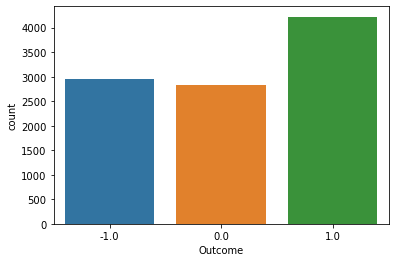

In [14]:
outcomes = data[['Outcome','GG_Outcome', 'Ov_Outcome']]

sns.countplot(x= 'Outcome',data=outcomes)


<AxesSubplot:xlabel='GG_Outcome', ylabel='count'>

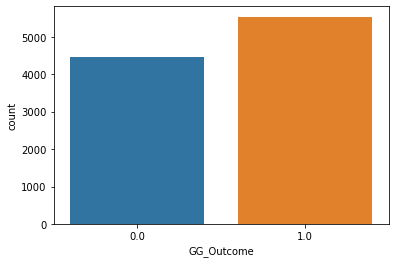

In [15]:
outcomes = data[['Outcome','GG_Outcome', 'Ov_Outcome']]

sns.countplot(x= 'GG_Outcome',data=outcomes)

<AxesSubplot:xlabel='Ov_Outcome', ylabel='count'>

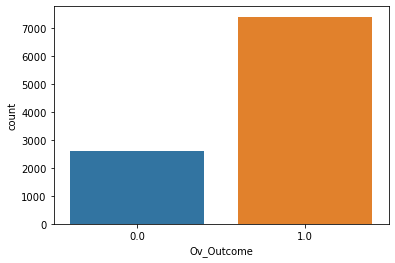

In [16]:
outcomes = data[['Outcome','GG_Outcome', 'Ov_Outcome']]

sns.countplot(x= 'Ov_Outcome',data=outcomes)

# THis will need a feature balancing when fiting to a model

# Checking feature importance to the match outcome

In [17]:
dd = data.drop(['Outcome','GG_Outcome','Date',  'Scores', 'Ov_Outcome'], axis=1)
X = dd.values
y = data['Ov_Outcome']

y = y.astype(int)

print(X.shape)
print(y.shape)

(10000, 24)
(10000,)


In [18]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i, column in enumerate(dd):
    print(column, "-->", dt.feature_importances_[i])
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

Home team --> 0.04457334770067958
Away team_x --> 0.07745414113905515
1 --> 0.035786059105133244
X --> 0.06556638287539976
2 --> 0.03632541432958978
Time --> 0.13699824967205165
GG --> 0.016692778609978125
NG --> 0.028698318466944615
OV1.5 --> 0.002099149821787899
UN1.5 --> 0.03788157689050134
H standing --> 0.043015489003803475
A standing --> 0.03745009019672837
H points --> 0.07258603741310152
A points --> 0.06362429822936497
H Form points --> 0.037872350099302655
A Form points --> 0.02676672044339069
H W --> 0.007747425532968667
H D --> 0.03679253460532135
H L --> 0.025342543711034383
A W --> 0.0077835007061287775
A D --> 0.01807732670557255
A L --> 0.0041992673703330164
Week --> 0.04763369935990489
Season --> 0.0890332980119234


In [19]:
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Importance'])
fi_df=fi_df.sort_values('Importance', ascending=False)
fi_df.reset_index(drop=True, inplace=True)
fi_df

,Feature,Importance
0,Time,0.136998
1,Season,0.089033
2,Away team_x,0.077454
3,H points,0.072586
4,X,0.065566
5,A points,0.063624
6,Week,0.047634
7,Home team,0.044573
8,H standing,0.043015
9,UN1.5,0.037882


# Data spliting

In [20]:

# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(7200, 24)
(2000, 24)
(800, 24)
(7200,)
(2000,)
(800,)


In [21]:

# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(7200, 24)
(2000, 24)
(800, 24)
(7200,)
(2000,)
(800,)


# Neural Network Model

In [22]:
mlp = MLPClassifier(solver='adam', alpha= 0.00005, hidden_layer_sizes=(3,5), 
                     activation='relu',learning_rate='adaptive',
                   learning_rate_init=1, shuffle=True).fit(X_train,y_train)
mlp

MLPClassifier(alpha=5e-05, hidden_layer_sizes=(3, 5), learning_rate='adaptive',
              learning_rate_init=1)

In [23]:
mlp.score(X_test,y_test)

0.744

In [24]:
mlp.score(X_test,y_test)

0.744

In [25]:
mlp.classes_

array([0, 1])

# Tune for - Activation and Solver

In [26]:
num_repetition = 7

In [27]:
# Create a placeholder for experimentations
activation_options = ['identity', 'logistic', 'tanh', 'relu']
solver_options = ['lbfgs','sgd','adam']

my_index = pd.MultiIndex.from_product([activation_options,solver_options],
                                     names=('activation', 'solver'))

tune_df = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df

R0   R1   R2   R3   R4   R5   R6
activation solver                                   
identity   lbfgs   NaN  NaN  NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN  NaN  NaN
logistic   lbfgs   NaN  NaN  NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN  NaN  NaN
tanh       lbfgs   NaN  NaN  NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN  NaN  NaN
relu       lbfgs   NaN  NaN  NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [28]:
n = len(y_train)
for activation_o in activation_options:
    for solver_o in solver_options:
        for rep in tune_df.columns:
            odi_mlp = MLPClassifier(solver= solver_o, activation= activation_o).fit(X_train,y_train)

            #odi_mlp.fit(X_train, y_train)
            #y_tune_predict = odi_mlp.predict(X_test)
            #RSME = np.sqrt(np.sum((y_tune_predict - y_test)**2)/n)
            score = odi_mlp.score(X_test,y_test)
            tune_df.at[(activation_o,solver_o),rep] = score

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or sca

In [29]:
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Mean', ascending=False)

R0     R1      R2     R3     R4     R5     R6  \
activation solver                                                      
identity   lbfgs    0.744  0.744   0.744  0.744  0.744  0.744  0.744   
logistic   lbfgs    0.744  0.744   0.744  0.744  0.744  0.744  0.744   
           sgd      0.744  0.744   0.744  0.744  0.744  0.744  0.744   
           adam     0.744  0.744   0.744  0.744  0.744  0.744  0.744   
tanh       lbfgs    0.744  0.744   0.744  0.744  0.744  0.744  0.744   
           sgd      0.744  0.744   0.744  0.744  0.744  0.744  0.744   
           adam     0.744  0.744   0.744  0.744  0.744  0.744  0.744   
relu       lbfgs    0.744  0.744   0.744  0.744  0.744  0.744  0.744   
           sgd      0.744  0.744   0.744  0.744  0.744  0.744  0.744   
           adam     0.744  0.744   0.744  0.744  0.744  0.744  0.503   
identity   adam    0.4725  0.744  0.4305  0.744  0.744  0.744  0.744   
           sgd      0.256  0.256   0.256  0.256  0.256  0.256  0.256   

                       Mean     Min  
activation solver                    
identity   lbfgs   0.744000  0.7440  
logistic   lbfgs   0.744000  0.7440  
           sgd     0.744000  0.7440  
           adam    0.744000  0.7440  
tanh       lbfgs   0.744000  0.7440  
           sgd     0.744000  0.7440  
           adam    0.744000  0.7440  
relu       lbfgs   0.744000  0.7440  
           sgd     0.744000  0.7440  
           adam    0.709571  0.5030  
identity   adam    0.660429  0.4305  
           sgd     0.256000  0.2560

# Tune for hidden_layer_sizes

In [30]:
# This code is basically creating a list of 15 one layered ANN ([1] - [15]) 
# and 100 two layered ANNs ([1,1] - [10,10])

PossibleNetStrct = []
PossibleNetString = []

for i in range(1,16):
    netStruct = [i]
    PossibleNetStrct.append(netStruct)
    PossibleNetString.append(str(netStruct))
    print('Network Structure:', netStruct)
    
for i in range(1,11):
    for j in range(1,11):
        netStruct = [i,j]
        PossibleNetStrct.append(netStruct)
        PossibleNetString.append(str(netStruct))
        print('Network Structure:', netStruct)

Network Structure: [1]
Network Structure: [2]
Network Structure: [3]
Network Structure: [4]
Network Structure: [5]
Network Structure: [6]
Network Structure: [7]
Network Structure: [8]
Network Structure: [9]
Network Structure: [10]
Network Structure: [11]
Network Structure: [12]
Network Structure: [13]
Network Structure: [14]
Network Structure: [15]
Network Structure: [1, 1]
Network Structure: [1, 2]
Network Structure: [1, 3]
Network Structure: [1, 4]
Network Structure: [1, 5]
Network Structure: [1, 6]
Network Structure: [1, 7]
Network Structure: [1, 8]
Network Structure: [1, 9]
Network Structure: [1, 10]
Network Structure: [2, 1]
Network Structure: [2, 2]
Network Structure: [2, 3]
Network Structure: [2, 4]
Network Structure: [2, 5]
Network Structure: [2, 6]
Network Structure: [2, 7]
Network Structure: [2, 8]
Network Structure: [2, 9]
Network Structure: [2, 10]
Network Structure: [3, 1]
Network Structure: [3, 2]
Network Structure: [3, 3]
Network Structure: [3, 4]
Network Structure: [3, 

In [31]:
tune_df1 = pd.DataFrame(np.nan, index =PossibleNetString,
                      columns = ['R{}'.format(i) for i in range(num_repetition)])

n = len(y_train)

for i,netStr in enumerate(PossibleNetStrct):
    RowName = PossibleNetString[i]
    for rep in tune_df.columns:
        
        odi_mlp1 = MLPClassifier(solver= 'lbfgs', activation= 'logistic', hidden_layer_sizes=netStr).fit(X_train,y_train)
                
#         y_tune_predict = car_mlp.predict(X_tune)
#         RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
        score1 = odi_mlp1.score(X_test,y_test)
        tune_df1.at[RowName, rep] = score1
    print(netStr)

[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[1, 1]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[2, 1]
[2, 2]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 8]
[2, 9]
[2, 10]
[3, 1]
[3, 2]
[3, 3]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[3, 10]
[4, 1]
[4, 2]
[4, 3]
[4, 4]
[4, 5]
[4, 6]
[4, 7]
[4, 8]
[4, 9]
[4, 10]
[5, 1]
[5, 2]
[5, 3]
[5, 4]
[5, 5]
[5, 6]
[5, 7]
[5, 8]
[5, 9]
[5, 10]
[6, 1]
[6, 2]
[6, 3]
[6, 4]
[6, 5]
[6, 6]
[6, 7]
[6, 8]
[6, 9]
[6, 10]
[7, 1]
[7, 2]
[7, 3]
[7, 4]
[7, 5]
[7, 6]
[7, 7]
[7, 8]
[7, 9]
[7, 10]
[8, 1]
[8, 2]
[8, 3]
[8, 4]
[8, 5]
[8, 6]
[8, 7]
[8, 8]
[8, 9]
[8, 10]
[9, 1]
[9, 2]
[9, 3]
[9, 4]
[9, 5]
[9, 6]
[9, 7]
[9, 8]
[9, 9]
[9, 10]
[10, 1]
[10, 2]
[10, 3]
[10, 4]
[10, 5]
[10, 6]
[10, 7]
[10, 8]
[10, 9]
[10, 10]


In [32]:
tune_df1['Mean'] = tune_df1[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df1['Min'] = tune_df1[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df1.sort_values('Mean', ascending=False)

,R0,R1,R2,R3,R4,R5,R6,Mean,Min
[1],0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
"[8, 2]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
"[7, 10]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
"[7, 9]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
"[7, 8]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
...,...,...,...,...,...,...,...,...,...
"[2, 10]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
"[2, 9]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
"[2, 8]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
"[2, 7]",0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744


# Tune for learning_rate, learning_rate_init

In [33]:
LR_options = ['constant','invscaling','adaptive']
LRI_options = [0.000001, 0.00001, 0.0001,0.001,0.005,0.01,0.05,0.1]

my_index = pd.MultiIndex.from_product([LR_options,LRI_options],
                                     names=('LR', 'rate'))

tune_df2 = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df2

R0   R1   R2   R3   R4   R5   R6
LR         rate                                       
constant   0.000001  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.000010  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.000100  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.001000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.005000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.010000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.050000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.100000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
invscaling 0.000001  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.000010  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.000100  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.001000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.005000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.010000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.050000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.100000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
adaptive   0.000001  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.000010  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.000100  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.001000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.005000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.010000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.050000  NaN  NaN  NaN  NaN  NaN  NaN  NaN
           0.100000  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [34]:
for LR_o in LR_options:
    for LRI_o in LRI_options:
        for rep in tune_df.columns:
            odi_mlp2 = MLPClassifier(solver= 'lbfgs', activation= 'logistic', 
                                     hidden_layer_sizes=(8,3), learning_rate=LR_o,
                                     learning_rate_init=LRI_o).fit(X_train,y_train)

            score2 = odi_mlp2.score(X_test,y_test)
            
            tune_df2.at[(LR_o,LRI_o),rep] = score2
        print((LR_o,LRI_o),"-->", score2)

('constant', 1e-06) --> 0.744
('constant', 1e-05) --> 0.744
('constant', 0.0001) --> 0.744
('constant', 0.001) --> 0.744
('constant', 0.005) --> 0.744
('constant', 0.01) --> 0.744
('constant', 0.05) --> 0.744
('constant', 0.1) --> 0.744
('invscaling', 1e-06) --> 0.744
('invscaling', 1e-05) --> 0.744
('invscaling', 0.0001) --> 0.744
('invscaling', 0.001) --> 0.744
('invscaling', 0.005) --> 0.744
('invscaling', 0.01) --> 0.744
('invscaling', 0.05) --> 0.744
('invscaling', 0.1) --> 0.744
('adaptive', 1e-06) --> 0.744
('adaptive', 1e-05) --> 0.744
('adaptive', 0.0001) --> 0.744
('adaptive', 0.001) --> 0.744
('adaptive', 0.005) --> 0.744
('adaptive', 0.01) --> 0.744
('adaptive', 0.05) --> 0.744
('adaptive', 0.1) --> 0.744


In [35]:
tune_df2['Mean'] = tune_df2[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df2[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df2.sort_values('Mean', ascending=False)

R0     R1     R2     R3     R4     R5     R6   Mean  \
LR         rate                                                               
constant   0.000001  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000010  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
adaptive   0.050000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.010000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.005000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.001000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000100  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000010  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000001  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
invscaling 0.100000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.050000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.010000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.005000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.001000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000100  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000010  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000001  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
constant   0.100000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.050000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.010000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.005000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.001000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
           0.000100  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   
adaptive   0.100000  0.744  0.744  0.744  0.744  0.744  0.744  0.744  0.744   

                       Min  
LR         rate             
constant   0.000001  0.744  
           0.000010  0.744  
adaptive   0.050000  0.744  
           0.010000  0.744  
           0.005000  0.744  
           0.001000  0.744  
           0.000100  0.744  
           0.000010  0.744  
           0.000001  0.744  
invscaling 0.100000  0.744  
           0.050000  0.744  
           0.010000  0.744  
           0.005000  0.744  
           0.001000  0.744  
           0.000100  0.744  
           0.000010  0.744  
           0.000001  0.744  
constant   0.100000  0.744  
           0.050000  0.744  
           0.010000  0.744  
           0.005000  0.744  
           0.001000  0.744  
           0.000100  0.744  
adaptive   0.100000  0.744

## Tune for max_iter, shuffle

In [36]:
max_iterations_options = [500,1000,2000,5000,10000]
shuffle_options = [True,False]

my_index = pd.MultiIndex.from_product([max_iterations_options,shuffle_options],
                                     names=('Max Iterations', 'shuffle'))

tune_df3 = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df3

R0   R1   R2   R3   R4   R5   R6
Max Iterations shuffle                                   
500            True     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN  NaN  NaN
1000           True     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN  NaN  NaN
2000           True     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN  NaN  NaN
5000           True     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN  NaN  NaN
10000          True     NaN  NaN  NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [37]:
for max_iterations_o in max_iterations_options:
    for shuffle_o in shuffle_options:
        for rep in tune_df.columns:
            odi_mlp3 = MLPClassifier(solver= 'lbfgs', activation= 'logistic', 
                                     hidden_layer_sizes=(8,3), learning_rate='constant',
                                     learning_rate_init=0.000001, max_iter=max_iterations_o,
                                    shuffle = shuffle_o).fit(X_train,y_train)

            score3 = odi_mlp3.score(X_test,y_test)
            
            tune_df3.at[(max_iterations_o,shuffle_o),rep] = score3
        

In [38]:
tune_df3['Mean'] = tune_df3[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df3[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df3.sort_values('Mean', ascending=False)

R0     R1     R2     R3     R4     R5     R6  \
Max Iterations shuffle                                                    
500            True     0.744  0.744  0.744  0.744  0.744  0.744  0.744   
               False    0.744  0.744  0.744  0.744  0.744  0.744  0.744   
1000           True     0.744  0.744  0.744  0.744  0.744  0.744  0.744   
               False    0.744  0.744  0.744  0.744  0.744  0.744  0.744   
2000           True     0.744  0.744  0.744  0.744  0.744  0.744  0.744   
               False    0.744  0.744  0.744  0.744  0.744  0.744  0.744   
5000           True     0.744  0.744  0.744  0.744  0.744  0.744  0.744   
               False    0.744  0.744  0.744  0.744  0.744  0.744  0.744   
10000          True     0.744  0.744  0.744  0.744  0.744  0.744  0.744   
               False    0.744  0.744  0.744  0.744  0.744  0.744  0.744   

                         Mean    Min  
Max Iterations shuffle                
500            True     0.744  0.744  
               False    0.744  0.744  
1000           True     0.744  0.744  
               False    0.744  0.744  
2000           True     0.744  0.744  
               False    0.744  0.744  
5000           True     0.744  0.744  
               False    0.744  0.744  
10000          True     0.744  0.744  
               False    0.744  0.744

# Tune for alpha

In [39]:
alpha_options =[0.00001,0.00005,0.0001,0.0005,0.001,0.005]

tune_df4 = pd.DataFrame(index = alpha_options,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df4

,R0,R1,R2,R3,R4,R5,R6
0.00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
for alpha_o in alpha_options:
    for rep in tune_df.columns:
        odi_mlp4 = MLPClassifier(solver= 'lbfgs', activation= 'logistic', 
                                     hidden_layer_sizes=(8,3), learning_rate='constant',
                                     learning_rate_init=0.000001, max_iter=500,
                                    shuffle = True, alpha=alpha_o).fit(X_train,y_train)
        score4 = odi_mlp3.score(X_test,y_test)
        tune_df4.at[alpha_o,rep] = score4
    print(alpha_o)

1e-05
5e-05
0.0001
0.0005
0.001
0.005


In [41]:
tune_df4['Mean'] = tune_df4[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df4['Min'] = tune_df4[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df4.sort_values('Mean', ascending=False)

,R0,R1,R2,R3,R4,R5,R6,Mean,Min
0.00001,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
0.00005,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
0.00010,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
0.00050,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
0.00100,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744
0.00500,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744


# Tune for Randomness

In [42]:
random_options = range(1,15)

tune_df5 = pd.DataFrame(index = random_options,
                       columns=['RSME'])
tune_df5

,RSME
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
10,NaN


In [43]:
for random_o in random_options:
    odi_mlp5 = MLPClassifier(solver= 'lbfgs', activation= 'logistic', 
                                     hidden_layer_sizes=(8,3), learning_rate='constant',
                                     learning_rate_init=0.000001, max_iter=500,
                                    shuffle = True, alpha=0.00005, random_state=random_o).fit(X_train,y_train)
    score5 = odi_mlp5.score(X_test,y_test)
    
    tune_df5.at[random_o,'RSME'] = score5
    print(random_o)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [44]:
tune_df5

,RSME
1,0.744
2,0.744
3,0.744
4,0.744
5,0.744
6,0.744
7,0.744
8,0.744
9,0.744
10,0.744


# Train the tuned MLP on train set
# Final Model

In [45]:
odi_mlp_final = MLPClassifier(solver= 'lbfgs', activation= 'logistic', 
                                 hidden_layer_sizes=(8,3), learning_rate='constant',
                                 learning_rate_init=0.000001, max_iter=500,
                                shuffle = True, alpha=0.00005, random_state=2).fit(X_train,y_train)
score_final = odi_mlp_final.score(X_test,y_test)
score_final

0.744